# Import Libraries

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe Data

In [5]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


# Barplot with Error Bars using Seaborn

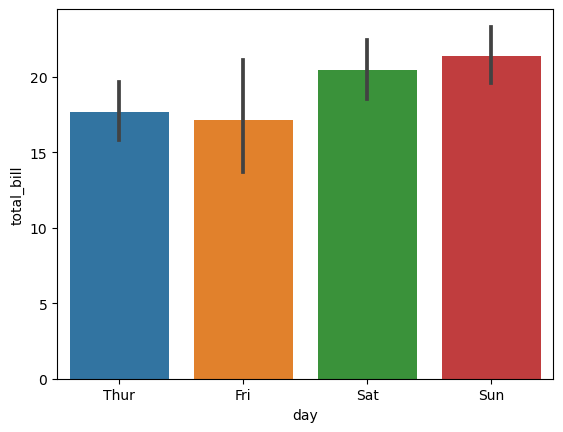

In [6]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95);

# Confidence Interval Step by Step

Calculate the sample mean

In [7]:
xbar = tips[tips["day"] == "Fri"]["total_bill"].mean()
xbar

17.151578947368417

Calculate the sample standard deviation

In [8]:
s = tips[tips["day"] == "Fri"]["total_bill"].std()
s

8.302659723217143

Calculate the sample size

In [9]:
n = tips[tips["day"] == "Fri"]["total_bill"].count()
n

19

Calculate the standard error of the sample mean

In [10]:
#with formula
s / np.sqrt(n)    

1.904760773479416

In [11]:
#with pandas method
sem = tips[tips["day"] == "Fri"]["total_bill"].sem()
sem

1.904760773479416

Calculate the margin of the error

In [12]:
#for 95% Confidence Level
moe = 1.96 * sem
moe

3.7333311160196554

How to calculate z critical value

In [13]:
z = stats.norm.ppf(1-0.025)

In [14]:
#for 95% Confidence Level
moe = z * sem
moe

3.7332625151843115

Calculate lower confidence limit

In [15]:
lower_limit = xbar - moe
lower_limit

13.418316432184106

Calculate upper confidence limit

In [16]:
upper_limit = xbar + moe
upper_limit

20.88484146255273

# Confidence Interval using Normal Distribution

In [17]:
stats.norm.interval(confidence=0.95, loc=xbar, scale=sem)

(13.418316432184106, 20.88484146255273)

# Confidence Interval using t Distribution

Confidence Interval using t Distribution

In [18]:
stats.t.interval(confidence=0.95, df=n-1, loc=xbar, scale=sem)   #CORRECT

(13.149825056979093, 21.15333283775774)

# Extra Practices

For Saturday

In [19]:
stats.t.interval(confidence=0.95,                                       #CONFIDENCE LEVEL
                 df=tips[tips["day"] == "Sat"]["total_bill"].count()-1, #DEGREES OF FREEDOM (N-1)
                 loc=tips[tips["day"] == "Sat"]["total_bill"].mean(),   #MEAN
                 scale=tips[tips["day"] == "Sat"]["total_bill"].sem())  #STANDARD ERROR OF THE MEAN

(18.420827942450163, 22.461930678239487)

In [20]:
stats.t.interval(confidence=0.99,                                       #CONFIDENCE LEVEL
                 df=tips[tips["day"] == "Sat"]["total_bill"].count()-1, #DEGREES OF FREEDOM (N-1)
                 loc=tips[tips["day"] == "Sat"]["total_bill"].mean(),   #MEAN
                 scale=tips[tips["day"] == "Sat"]["total_bill"].sem())  #STANDARD ERROR OF THE MEAN

(17.76394599025322, 23.11881263043643)

In [21]:
#The higher the confidence level, the wider the confidence interval

In [22]:
stats.t.interval(confidence=0.999,                                      #CONFIDENCE LEVEL
                 df=tips[tips["day"] == "Sat"]["total_bill"].count()-1, #DEGREES OF FREEDOM (N-1)
                 loc=tips[tips["day"] == "Sat"]["total_bill"].mean(),   #MEAN
                 scale=tips[tips["day"] == "Sat"]["total_bill"].sem())  #STANDARD ERROR OF THE MEAN

(16.978192518192095, 23.90456610249759)